In [1]:
#Solves the SSD set of equations

#eqn : du/dt = R - r_m*U
#eqn : R = 0.25 * k * (k_plus_square - k_e_square) * C_13 
#eqn : dC/dt = A(U)*C + C*Transpose(A(U)) + eps*Q
#eqn : A(U) = W + UL

import numpy as np
import matplotlib.pyplot as plt


In [2]:

class Simulation:
    def __init__(self, epsilon, N_0_squared, r_m, k, m, m_u, dt, total_time, U, C, current_time):

        #Make sure this is updated

        self.epsilon = epsilon
        self.N_0_squared = N_0_squared
        self.r_m = r_m
        self.k = k
        self.m = m
        self.m_u = m_u
        self.dt = dt
        self.total_time = total_time
        self.num_steps = int(total_time / dt)
        self.k_e_square = k**2 + m**2
        self.k_plus_square = k**2 + (m + m_u)**2

        self.W_e = np.array([[-1, (k / self.k_e_square)], [-k * N_0_squared, -1]])
        self.W_plus = np.array([[-1, -k / self.k_plus_square], [k * N_0_squared, -1]])
        self.L_e_plus = np.array([[(-k / (2 * self.k_e_square)) * (self.k_plus_square - m_u**2), 0],
                                  [0, k / 2]])
        self.L_plus_e = np.array([[(-k / (2 * self.k_plus_square)) * (m_u**2 - self.k_e_square), 0],
                                  [0, -k / 2]]) 
        self.U = U
        # self.C = np.array([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
        self.C = C

        self.current_time = current_time

        self.A_U = np.array([[-1, (k / self.k_e_square), self.U*(-k / (2 * self.k_e_square)) * (self.k_plus_square - m_u**2), self.U*0],
                             
                             [-k * N_0_squared, -1, self.U*0, self.U*self.k/2],

                             [self.U*(-k / (2 * self.k_plus_square)) * (m_u**2 - self.k_e_square), self.U*0, -1, -self.k/self.k_plus_square],

                             [self.U*0, self.U* -k / 2,k * N_0_squared, -1]])  
    
        self.Q = np.array([[8/self.k_e_square, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
        self.R = 0
        self.C_History = np.zeros((self.num_steps, 4, 4))              
        # self.C_History = np.zeros(self.num_steps)
        self.U_History = np.zeros(self.num_steps)
        self.R_History = np.zeros(self.num_steps)
        self.C = self.C.astype(np.float64)

    def simulate(self):
        for i in range(self.num_steps):

            self.A_U = np.array([[-1, (k / self.k_e_square), self.U*(-k / (2 * self.k_e_square)) * (self.k_plus_square - m_u**2), self.U*0],
                             
                             [-k * N_0_squared, -1, self.U*0, self.U*self.k/2],

                             [self.U*(-k / (2 * self.k_plus_square)) * (m_u**2 - self.k_e_square), self.U*0, -1, -self.k/self.k_plus_square],

                             [self.U*0, self.U* -k / 2,k * N_0_squared, -1]]) 
                             
 
            C_dot = (self.A_U @ self.C + self.C @ np.transpose(self.A_U) + self.epsilon * self.Q) 
            U_dot = (self.R - self.r_m * self.U)

            
            self.C += C_dot * self.dt
            self.U += U_dot * self.dt
            self.R = 0.25 * self.k * (self.k_plus_square - self.k_e_square) * self.C[0][2]

            self.C_History[i] = self.C
            self.U_History[i] = self.U
            self.R_History[i] = self.R


In [7]:

def make_plots(sims):

    time_array = np.arange(0, sims[0].total_time, .001)
    fig, axs = plt.subplots(10, 2, figsize = (20, 65))

    for i in range(10):
        axs[i, 0].plot(time_array, sims[i].U_History)
        axs[i, 0].set_title(f"U History at {sims[i].current_time}")
        axs[i, 0].grid()
        axs[i, 1].plot(time_array, sims[i].R_History)
        axs[i, 1].set_title(f"R Values at {sims[i].current_time}")
        axs[i, 1].grid()

    plt.subplots_adjust(wspace=.4)
    plt.subplots_adjust(hspace=.4)

    plt.show()


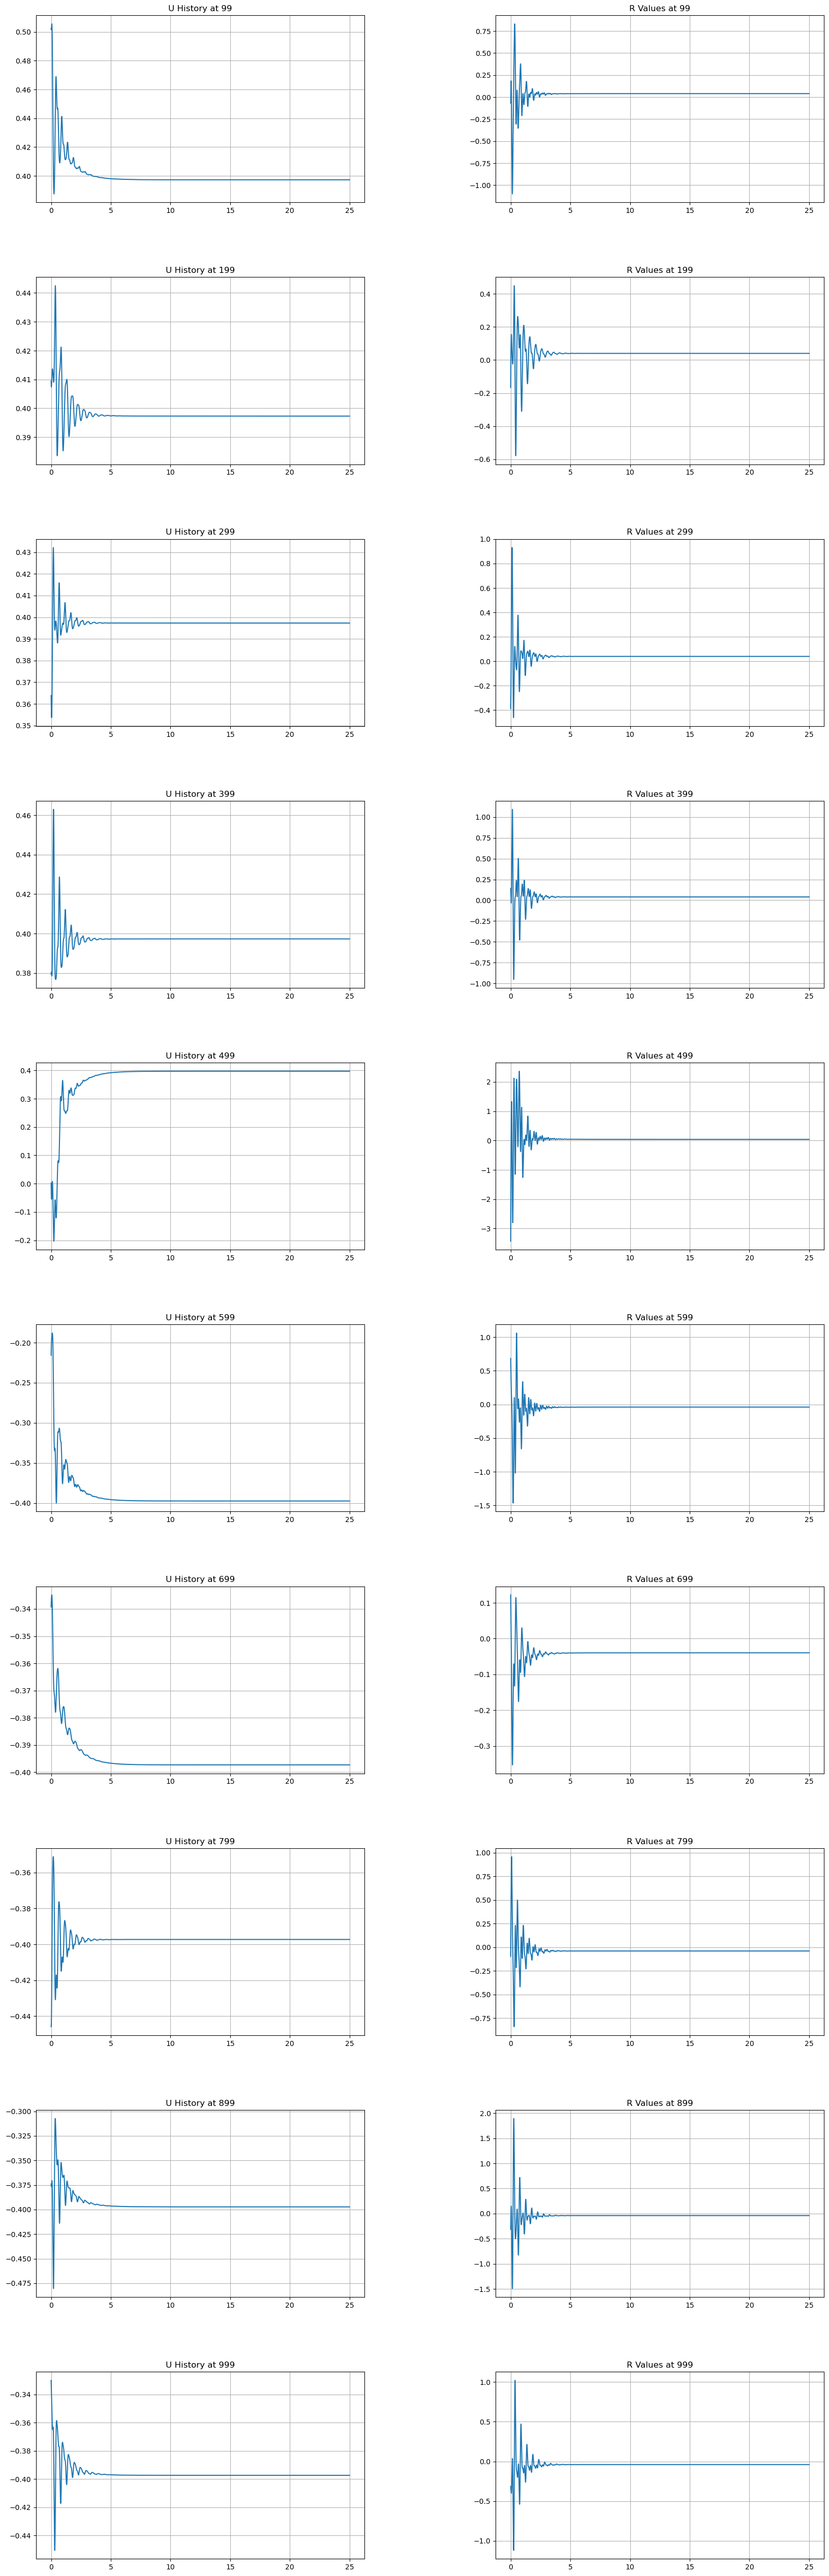

In [8]:


if __name__ == "__main__":
    epsilon = 0.12394270273516043
    N_0_squared = 318.8640217310387
    r_m = 0.1
    k = 2 * np.pi * 6
    m = 2 * np.pi * 3
    m_u = 2 * np.pi * 7
    dt = 0.001
    total_time = 25

    k_e_square = k**2 + m**2

    C_11 = (2*epsilon/k_e_square)*(2-(np.square(k) * N_0_squared/(k_e_square + np.square(k)*N_0_squared)))
    C_12 = -(2*epsilon*k*N_0_squared)/(k_e_square + np.square(k)*N_0_squared)
    C_22 = (2*epsilon*np.square(k)*np.square(N_0_squared))/(k_e_square + np.square(k)*N_0_squared)


    U_entries = np.array([0.5022827801804544, 0.40950991628144395, 0.36386063053663087, 0.3794275046949516, 0.0021052785076200523, -0.21572820861504546, -0.33933857396878414, -0.44582272206193174, -0.37404536864576843, -0.33003068506849215])
    C_entries = np.array([[[3.209225737451153e-05,
  0.004308328634512763,
  -2.2865617299652913e-06,
  -0.04298516464145379],
 [0.004308328634512763,
  0.5783854780407179,
  -0.00030696685685982993,
  -5.770682115715138],
 [-2.2865617299652913e-06,
  -0.00030696685685982993,
  1.6291669619645895e-07,
  0.003062677432702768],
 [-0.04298516464145379,
  -5.770682115715138,
  0.003062677432702768,
  57.57539451619873]], [[4.674061556047324e-06,
  -0.015152332601359049,
  -5.253684734195421e-06,
  -0.010543186474467389],
 [-0.015152332601359049,
  49.120701665804866,
  0.017031350041211486,
  34.17881134504736],
 [-5.253684734195421e-06,
  0.017031350041211486,
  5.905186090373037e-06,
  0.011850630798608194],
 [-0.010543186474467389,
  34.17881134504736,
  0.011850630798608194,
  23.782053296147613]], [[4.2902852820799504e-05,
  -0.05776262630394941,
  -1.1623135158089199e-05,
  0.020913647682537603],
 [-0.05776262630394941,
  77.76921062722774,
  0.015648908370296363,
  -28.15727011871854],
 [-1.1623135158089199e-05,
  0.015648908370296363,
  3.148911133427319e-06,
  -0.005665873891373166],
 [0.020913647682537603,
  -28.15727011871854,
  -0.005665873891373166,
  10.194675426741465]], [[0.00014732175533658907,
  -0.10022658170538411,
  4.334461987889665e-06,
  0.003599936287279282],
 [-0.10022658170538411,
  68.18658695312973,
  -0.002948840159999165,
  -2.4491244189076187],
 [4.334461987889665e-06,
  -0.002948840159999165,
  1.275274020563772e-07,
  0.00010591637983396548],
 [0.003599936287279282,
  -2.4491244189076187,
  0.00010591637983396548,
  0.08796760018818137]], [[0.00037464754867079866,
  -0.43371234047679336,
  -0.0001046607960770223,
  -0.07335717575778004],
 [-0.43371234047679336,
  502.0889498656411,
  0.1211610191599468,
  84.92224892850105],
 [-0.0001046607960770223,
  0.1211610191599468,
  2.9237832395644953e-05,
  0.02049291511451366],
 [-0.07335717575778004,
  84.92224892850105,
  0.02049291511451366,
  14.36356718267584]], [[0.000502036223101408,
  -0.03506758548396667,
  2.044096583350114e-05,
  0.04254621386930327],
 [-0.03506758548396667,
  2.4494956640348073,
  -0.001427815929920163,
  -2.971883149514389],
 [2.044096583350114e-05,
  -0.001427815929920163,
  8.322767660571007e-07,
  0.001732316641764691],
 [0.04254621386930327,
  -2.971883149514389,
  0.001732316641764691,
  3.6056767048198615]], [[2.6475415454580633e-05,
  -0.026549380836582464,
  3.691906861667028e-06,
  0.0009266904809122064],
 [-0.026549380836582464,
  26.623552858504414,
  -0.0037022210832439034,
  -0.9292794115953044],
 [3.691906861667028e-06,
  -0.0037022210832439034,
  5.148238862807293e-07,
  0.00012922384356878395],
 [0.0009266904809122064,
  -0.9292794115953044,
  0.00012922384356878395,
  0.03243594983000424]], [[2.3132908740317164e-06,
  -0.013119841309147893,
  -3.2784103608848675e-06,
  0.006064271697738729],
 [-0.013119841309147893,
  74.40924870689803,
  0.018593521534156204,
  -34.393548698536115],
 [-3.2784103608848675e-06,
  0.018593521534156204,
  4.646183761415681e-06,
  -0.008594323951331568],
 [0.006064271697738729,
  -34.393548698536115,
  -0.008594323951331568,
  15.89743496454513]], [[0.00025615893953517414,
  -0.1361574153724205,
  -9.749944394245619e-06,
  -0.03861531552553974],
 [-0.1361574153724205,
  72.37241766591642,
  0.005182435682917152,
  20.525387735008287],
 [-9.749944394245619e-06,
  0.005182435682917152,
  3.711032527827448e-07,
  0.0014697795822525405],
 [-0.03861531552553974,
  20.525387735008287,
  0.0014697795822525405,
  5.821161642232034]], [[0.00010069930425200607,
  0.10780210165882807,
  -9.21441099886821e-06,
  -0.010822046507882056],
 [0.10780210165882807,
  115.40589290445659,
  -0.009864346914853939,
  -11.585376547187273],
 [-9.21441099886821e-06,
  -0.009864346914853939,
  8.431574645598605e-07,
  0.0009902628932066844],
 [-0.010822046507882056,
  -11.585376547187273,
  0.0009902628932066844,
  1.163033761640206]]])
    current_time_entries = np.array([99, 199, 299, 399get
    
    make_plots(sims)
    

